In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, simplify, lambdify, Float
from scipy.interpolate import lagrange as scipy_lagrange

In [ ]:
def interpolacao_lagrange(x_vals, y_vals):
    """
    Aplica a interpolação de Lagrange para os pontos fornecidos.

    Parâmetros:
    x_vals -- Lista de coordenadas x dos pontos
    y_vals -- Lista de coordenadas y dos pontos

    Retorna:
    Polinômio de Lagrange com coeficientes arredondados e uma tabela de pontos interpolados
    """
    x = symbols('x')
    n = len(x_vals)
    L = 0
    for i in range(n):
        termo = 1
        for j in range(n):
            if i != j:
                termo *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        L += y_vals[i] * termo

    L = sp.simplify(L)
    L = sp.expand(L)
    coeffs = sp.Poly(L).all_coeffs()
    rounded_coeffs = [Float(c.evalf(), 4) for c in coeffs]
    # rounded_coeffs = [Float(-c.evalf(), 4) for c in coeffs]  # Inverte os sinais aqui
    L = sum(c * x**i for i, c in enumerate(reversed(rounded_coeffs)))

    f_lagrange = lambdify(x, L, 'numpy')
    tabela = [(round(xi, 4), round(f_lagrange(xi), 4)) for xi in x_vals]

    return L, tabela, f_lagrange

Interpolação de Lagrange

Polinômio interpolador de Lagrange:
          2                
- 0.3333⋅x  - 1.667⋅x + 1.0

Tabela de pontos interpolados:
x = -2.0000, y = 3.0008
x = 0.0000, y = 1.0000
x = 1.0000, y = -1.0003
Para x = -1.0000, y estimado = 2.3337


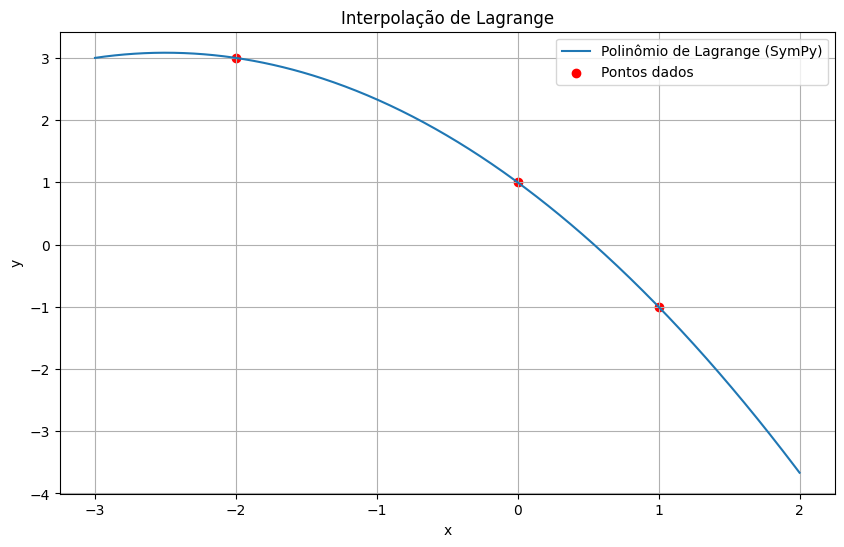

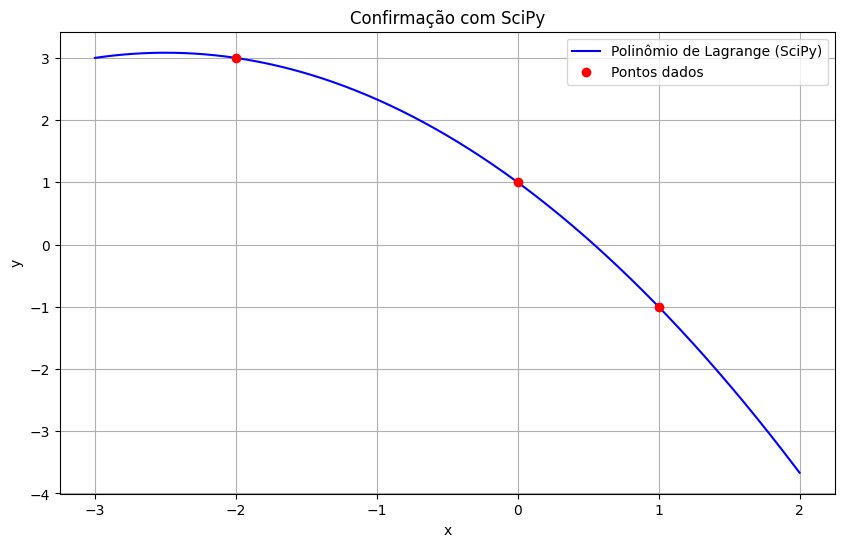

In [8]:
# Interpolação de Lagrange
print("Interpolação de Lagrange")
n = int(input("Digite o número de pontos (n): "))
x_vals = []
y_vals = []

for i in range(n):
    x = float(input(f"x{i}: "))
    y = float(input(f"y{i}: "))
    x_vals.append(x)
    y_vals.append(y)

L, tabela, f_lagrange = interpolacao_lagrange(x_vals, y_vals)

print("\nPolinômio interpolador de Lagrange:")
print(sp.pretty(L, use_unicode=True))

# Tabela de pontos interpolados
print("\nTabela de pontos interpolados:")
for xi, yi in tabela:
    print(f"x = {xi:.4f}, y = {yi:.4f}")

# Permitir que o usuário insira um valor de x para estimar y
while True:
    try:
        x_input = input("\nDigite um valor de x para estimar y (ou 'sair' para encerrar): ")
        if x_input.lower() == 'sair':
            break
        x_input = float(x_input)
        y_estimado = f_lagrange(x_input)
        print(f"Para x = {x_input:.4f}, y estimado = {y_estimado:.4f}")
    except ValueError:
        print("Entrada inválida. Digite um número ou 'sair'.")

# Gráfico do polinômio do SymPy
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_lagrange(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Polinômio de Lagrange (SymPy)')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados')
plt.title('Interpolação de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Confirmação com scipy.interpolate.lagrange
f_scipy = scipy_lagrange(np.array(x_vals), np.array(y_vals))
x_new = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)

plt.figure(figsize=(10, 6))
plt.plot(x_new, f_scipy(x_new), 'b', label='Polinômio de Lagrange (SciPy)')
plt.plot(x_vals, y_vals, 'ro', label='Pontos dados')
plt.title('Confirmação com SciPy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()